# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [6]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [9]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [15]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(
    q='bitcoin AND BTC',
    language='en',
    sort_by='relevancy'
)
print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")
bitcoin_articles["articles"][0]


Total articles about Bitcoin: 1321


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'This Ransomware Stole $25 Million in 5 Months',
 'description': 'A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five months, a solid haul for what amounts to a solid ransomware…',
 'url': 'https://gizmodo.com/this-ransomware-stole-25-million-in-5-months-1844609509',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/xpts6nwwp4jgsoqmmryt.jpg',
 'publishedAt': '2020-08-04T20:30:00Z',
 'content': 'A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars]'}

In [14]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(
    q='ethereum AND ETH',
    language='en',
    sort_by='relevancy'
)
print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")
ethereum_articles["articles"][0]


Total articles about Ethereum: 463


{'source': {'id': None, 'name': 'Hongkiat.com'},
 'author': 'Ashutosh KS',
 'title': 'Top 10 Ethereum Exchanges to Buy and Sell ETH',
 'description': "Ethereum is one of the most growing cryptocurrencies in the recent times And if you're looking forward to investing in the world's first peer-to-peer",
 'url': 'https://www.hongkiat.com/blog/buy-sell-exchange-ethereum/',
 'urlToImage': 'https://assets.hongkiat.com/uploads/buy-sell-exchange-ethereum/coinbase-user-dashboard.jpg?14-09-2017',
 'publishedAt': '2020-08-11T13:46:23Z',
 'content': 'Ethereum is one of the most growing cryptocurrencies in the recent times\r\n And if you’re looking forward to investing in the world’s first peer-to-peer computing network, then you’re not the only one… [+11039 chars]'}

In [25]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
1,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881
2,2020-08-20,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910
3,2020-08-12,Seminal crypto-fund Grayscale Bitcoin BTC Trus...,0.7096,0.169,0.000,0.831
4,2020-08-07,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910


In [26]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-11,Ethereum is one of the most growing cryptocurr...,0.2484,0.057,0.000,0.943
1,2020-08-02,"On Aug. 2, the price of Ethereum peaked at $41...",-0.2732,0.000,0.052,0.948
2,2020-08-04,Ethereum 2.0s final and official public testne...,0.0000,0.000,0.000,1.000
3,2020-07-31,"Though now evolved in many ways, Gavin Wood wr...",0.4404,0.094,0.000,0.906
4,2020-08-21,Hopes the bottleneck on the Ethereum blockchai...,0.6486,0.142,0.000,0.858


In [28]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.487265,0.096450,0.003700,0.899850
std,0.186891,0.025574,0.016547,0.022958
min,-0.267700,0.045000,0.000000,0.831000
25%,0.507000,0.090000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.709600,0.169000,0.074000,0.910000


In [27]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.161245,0.051600,0.020350,0.928000
std,0.340849,0.056516,0.045902,0.076318
min,-0.599400,0.000000,0.000000,0.749000
25%,0.000000,0.000000,0.000000,0.899750
50%,0.088950,0.052500,0.000000,0.942000
75%,0.440400,0.080000,0.008750,1.000000
max,0.771700,0.165000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [29]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [59]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

sw_expanded = {"fucking", "every", "whats", "tell", "writes", "going", "today", "another"}

In [60]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
        
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words 
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_expanded)]
    return tokens


In [61]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df['text'].fillna('').apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878,"[ransomware, variant, called, netwalker, surpr..."
1,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."
2,2020-08-20,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, bitcoin,..."
3,2020-08-12,Seminal crypto-fund Grayscale Bitcoin BTC Trus...,0.7096,0.169,0.000,0.831,"[seminal, cryptofund, grayscale, bitcoin, btc,..."
4,2020-08-07,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, bitcoin,..."


In [62]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df['text'].fillna('').apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-11,Ethereum is one of the most growing cryptocurr...,0.2484,0.057,0.000,0.943,"[ethereum, one, growing, cryptocurrencies, rec..."
1,2020-08-02,"On Aug. 2, the price of Ethereum peaked at $41...",-0.2732,0.000,0.052,0.948,"[aug, price, ethereum, peaked, within, minute,..."
2,2020-08-04,Ethereum 2.0s final and official public testne...,0.0000,0.000,0.000,1.000,"[ethereum, final, official, public, testnet, m..."
3,2020-07-31,"Though now evolved in many ways, Gavin Wood wr...",0.4404,0.094,0.000,0.906,"[though, evolved, many, way, gavin, wood, wrot..."
4,2020-08-21,Hopes the bottleneck on the Ethereum blockchai...,0.6486,0.142,0.000,0.858,"[hopes, bottleneck, ethereum, blockchain, migh..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [63]:
from collections import Counter
from nltk import ngrams

In [64]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_words = []
for i in bitcoin_df['tokens']:
    bitcoin_words = bitcoin_words + i

bitcoin_ngrams = Counter(ngrams(bitcoin_words,n=2))
print(dict(bitcoin_ngrams))

{('ransomware', 'variant'): 1, ('variant', 'called'): 1, ('called', 'netwalker'): 1, ('netwalker', 'surprisingly'): 1, ('surprisingly', 'well'): 1, ('well', 'even'): 1, ('even', 'economy'): 1, ('economy', 'malware'): 1, ('malware', 'take'): 1, ('take', 'computer'): 1, ('computer', 'hostage'): 1, ('hostage', 'asks'): 1, ('asks', 'bitcoin'): 1, ('bitcoin', 'ransom'): 1, ('ransom', 'raked'): 1, ('raked', 'million'): 1, ('million', 'last'): 1, ('last', 'five'): 1, ('five', 'char'): 1, ('char', 'outspoken'): 1, ('outspoken', 'bitcoin'): 1, ('bitcoin', 'whale'): 1, ('whale', 'rarely'): 1, ('rarely', 'show'): 1, ('show', 'affection'): 1, ('affection', 'anything'): 1, ('anything', 'btc'): 1, ('btc', 'say'): 1, ('say', 'two'): 1, ('two', 'crypto'): 1, ('crypto', 'asset'): 1, ('asset', 'potentialthe'): 1, ('potentialthe', 'pseudonymous'): 1, ('pseudonymous', 'trader'): 1, ('trader', 'known'): 1, ('known', 'joe'): 1, ('joe', 'say'): 1, ('say', 'unus'): 1, ('unus', 'sed'): 1, ('sed', 'leo'): 1, ('

In [65]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_words = []
for i in ethereum_df['tokens']:
    ethereum_words = ethereum_words + i

ethereum_ngrams = Counter(ngrams(ethereum_words,n=2))
print(dict(ethereum_ngrams))

{('ethereum', 'one'): 1, ('one', 'growing'): 1, ('growing', 'cryptocurrencies'): 1, ('cryptocurrencies', 'recent'): 1, ('recent', 'time'): 2, ('time', 'youre'): 1, ('youre', 'looking'): 1, ('looking', 'forward'): 1, ('forward', 'investing'): 1, ('investing', 'world'): 1, ('world', 'first'): 1, ('first', 'peertopeer'): 1, ('peertopeer', 'computing'): 1, ('computing', 'network'): 1, ('network', 'youre'): 1, ('youre', 'one'): 1, ('one', 'char'): 1, ('char', 'aug'): 1, ('aug', 'price'): 1, ('price', 'ethereum'): 1, ('ethereum', 'peaked'): 1, ('peaked', 'within'): 1, ('within', 'minute'): 1, ('minute', 'dropped'): 1, ('dropped', 'binance'): 1, ('binance', 'futures'): 1, ('futures', 'eth'): 1, ('eth', 'plunged'): 1, ('plunged', 'low'): 1, ('low', 'recovering'): 1, ('recovering', 'back'): 1, ('back', 'within'): 1, ('within', 'minutesthe'): 1, ('minutesthe', 'e'): 1, ('e', 'char'): 1, ('char', 'ethereum'): 3, ('ethereum', 'final'): 1, ('final', 'official'): 1, ('official', 'public'): 1, ('publ

In [66]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [67]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_ngrams)

[(('satoshi', 'nakaboto'), 32),
 (('nakaboto', 'bitcoin'), 32),
 (('bitcoin', 'btc'), 17),
 (('char', 'robot'), 16),
 (('robot', 'colleague'), 16),
 (('colleague', 'satoshi'), 16),
 (('btc', 'daywelcome'), 16),
 (('daywelcome', 'edition'), 16),
 (('edition', 'bitcoin'), 16),
 (('bitcoin', 'satoshi'), 16)]

In [68]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_ngrams)


[(('btc', 'trading'), 4),
 (('trading', 'around'), 4),
 (('char', 'ethereum'), 3),
 (('recent', 'time'), 2),
 (('launch', 'eth'), 2),
 (('decentralized', 'exchange'), 2),
 (('char', 'bitcoins'), 2),
 (('bitcoins', 'price'), 2),
 (('fee', 'ethereum'), 2),
 (('around', 'char'), 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

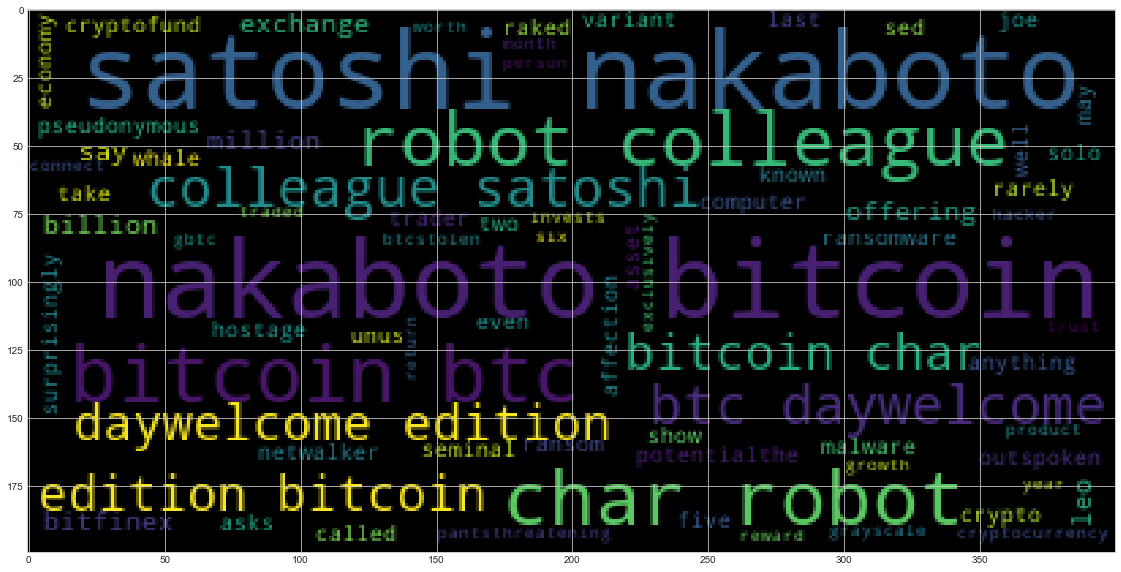

In [70]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc_btc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(wc_btc)

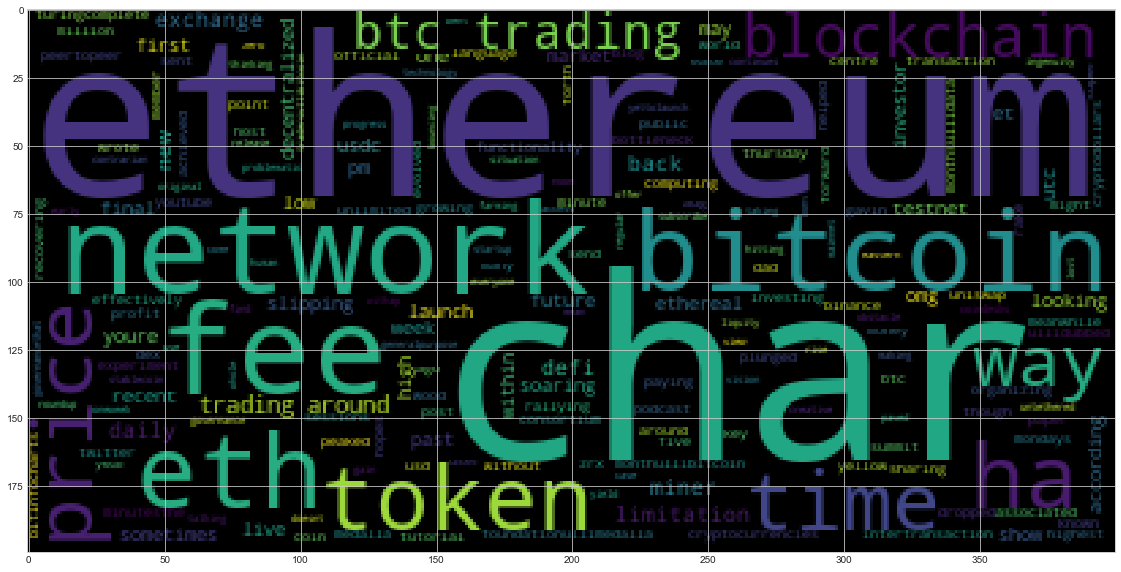

In [71]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc_eth = WordCloud().generate(' '.join(ethereum_words))
plt.imshow(wc_eth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [72]:
import spacy
from spacy import displacy

In [75]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [77]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_bitcoin_text = ' '.join(bitcoin_df['text'])

In [78]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(all_bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = 'Bitcoin NER'


In [79]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [81]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_doc.ents:
    print (ent.text, ent.label_)

NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Grayscale Bitcoin BTC Trust FAC
GBTC ORG
Bitcoin GPE
$1.5 billion MONEY
this year DATE
90% PERCENT
just six months DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Cryptocurrency ORG
Bitfinex PERSON
$400 million MONEY
$1.33 billion MONEY
Bitcoin BTCstolen FAC
2016 DATE
Bitfinex PERSON
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitco

---

## Ethereum NER

In [82]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_ethereum_text = ' '.join(ethereum_df['text'])

In [83]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = 'Ethereum NER'


In [85]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [86]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print (ent.text, ent.label_)

first ORDINAL
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Gavin Wood PERSON
Ethereums 2015 LOC
Mondays DATE
$7 million MONEY
the past month DATE
ul><li GPE
Bitcoin GPE
BTC ORG
around $12,00 MONEY
DeFi Dad PERSON
Twitter ORG
YouTube PERSON
the Ethereal Summit and Sessions ORG
The Ethereal Podcast ORG
the Centre Consortium ORG
Thursday DATE
ul><li PERSON
Dubbed GPE
USD Coin ORG
daily DATE
27 months DATE
daily DATE
Five years ago this week DATE
first ORDINAL
Bitcoins ORG
zero CARDINAL
BTC ORG
ETH ORG
CoinDesk’s Markets Daily ORG
Ap PERSON
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Ethereum 2.0 ORG
ETH ORG
Fall 2020 DATE
5-10% PERCENT
AZ / ACCESSWIRE / August 26, 2020 ORG
ETH 2.0 LAW
DeFi LOC
this weekend DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,579 MONEY
20:00 TIME
4 p.m. ET TIME
2.